#Sentiment Analysis on IMDb Reviews Using Neural Networks


In [ ]:
# Sentiment Analysis with IMDB Dataset

#In this notebook, we will perform sentiment analysis using the IMDB dataset. We will build a neural network model using Keras, train it, and evaluate its performance.

## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

#Load the IMDB Dataset
We will load the IMDB dataset and limit it to the top 10,000 most frequently occurring words.


In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


#Vectorization of Sequences
Define a function to vectorize the sequences into a binary matrix.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # One-hot encoding
    return results

#Prepare the Data
Vectorize the training and test data and convert labels to numpy arrays.

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Define the Model Architecture
We will define a simple neural network with Keras.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Create a Validation Set
We'll set aside a validation set from the training data.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Initialize Early Stopping Callback
We will use early stopping to prevent overfitting.

In [ ]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=1)

#Train the Model
Now, we will train the model and include validation data.

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_monitor])  # Include early stopping

Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.5094 - accuracy: 0.7774 - val_loss: 0.3877 - val_accuracy: 0.8600
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3024 - accuracy: 0.8974 - val_loss: 0.3211 - val_accuracy: 0.8680
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2269 - accuracy: 0.9204 - val_loss: 0.3051 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1841 - accuracy: 0.9375 - val_loss: 0.2772 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1533 - accuracy: 0.9489 - val_loss: 0.3091 - val_accuracy: 0.8778


#Plot Training and Validation Loss
Let's visualize the training and validation loss.

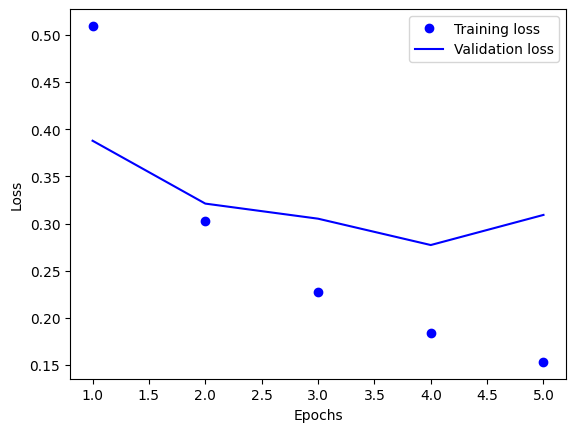

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot Training and Validation Accuracy
Now, we will visualize the training and validation accuracy.

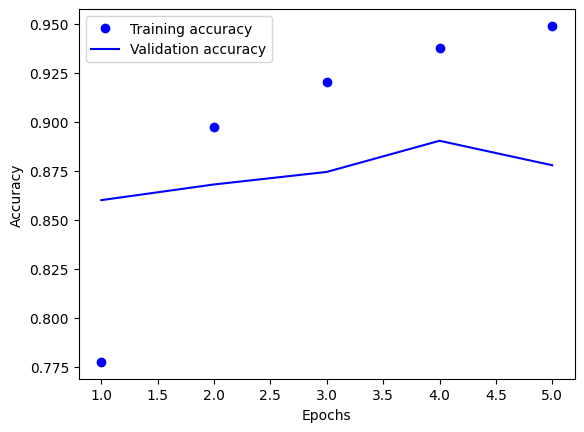

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Retrain the Model with the Complete Training Set
Now, we will define and compile the model once more, and retrain it on the entire training set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4908 - accuracy: 0.8114
Epoch 2/4
49/49 [==============================] - 2s 38ms/step - loss: 0.2948 - accuracy: 0.8993
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2270 - accuracy: 0.9196
Epoch 4/4
49/49 [==============================] - 1s 23ms/step - loss: 0.1929 - accuracy: 0.9309


#Evaluate the Model on the Test Set
Finally, we evaluate the model's performance on the test set.



In [ ]:
results = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)

782/782 [==============================] - 3s 4ms/step - loss: 0.2796 - accuracy: 0.8880
Test Loss, Test Accuracy: [0.27958786487579346, 0.8880400061607361]
